In [1]:
import pandas as pd
import numpy as np
import pylab as plt
plt.style.use('ggplot')

In [2]:

def quantize_dataframe(df):
    """
    Quantize the 'L' column of the dataframe to the nearest 0.5 and then aggregate 
    the other columns using the 'max' function within each collapsed interval.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame with 'L' and other numerical columns.

    Returns:
    - pd.DataFrame: Quantized DataFrame.
    """
    # Quantize the 'L' column
    #df['L_quantized'] = (df['L'] * 2).round() / 2
    df['L_quantized'] = (df['L']).round()
    
    # Define aggregation for other columns
    aggregation = {col: 'max' for col in df.columns if col != 'L_quantized'}
    aggregation['L'] = 'first'  # For 'L' column, just keep the first value (or replace with 'mean' if required)
    
    # Group by the quantized values
    df_quantized = df.groupby('L_quantized').agg(aggregation).reset_index(drop=True)
    
    # Rename 'L' column to its original name and drop the quantized column
    df_quantized = df_quantized.rename(columns={'L_quantized': 'L'})
    
    return df_quantized

In [3]:
df=pd.read_csv('pXhase3results/RESDSM3_.csv')
df['L'] = [np.round(x,1) for x in df.nq_mean.values]
df1=pd.read_csv('pXhase3results/RESphase3_.csv')
df1['L'] = [np.round(x,1) for x in df1.nq_mean.values]
dfm=quantize_dataframe(df).groupby('L').max().sort_values('L').acc.cummax()
df1m=quantize_dataframe(df1).groupby('L').max().sort_values('L').acc.cummax()


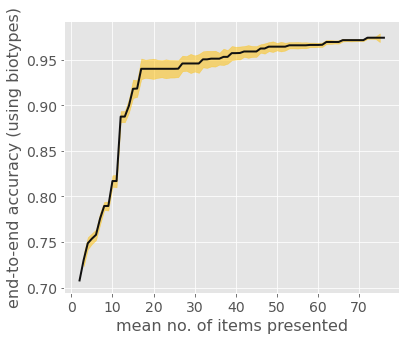

In [4]:
Lqr=df1.groupby('L_quantized').count().run
df1s=df1.groupby('L_quantized').std().sort_index().acc*(2/np.sqrt(Lqr.values))
df1m=df1.groupby('L_quantized').max().sort_index().acc.cummax()

fig=plt.figure(figsize=[6,5])
epx=.0
LW=2
#dfm=df.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
#df1m=df1.groupby('L').max().sort_index().acc.cummax().ewm(alpha=.4).mean()
#plt.fill_between(dfm.index.values,dfm+dfs.fillna(0).acc+epx,dfm-dfs.fillna(0).acc-epx,alpha=.5)
#epx=.0
plt.fill_between(df1m.index.values,df1m+df1s+epx,df1m-df1s-epx,alpha=.5,color='#FFBF00')
#dfm.plot(color='k',lw=LW)
df1m.plot(color='#111111',lw=LW)
#plt.gca().set_ylim(.82,.95)
#plt.gca().set_xlim(10,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy (using biotypes)',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('./phase3results_new/Lvsacc_onlybiotype.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(df1m).join(pd.DataFrame(df1s),rsuffix='_std').to_excel('./phase3results_new/itemsVsacc.xlsx')

In [5]:
df1m.head(60)

L_quantized
2.0     0.707767
3.0     0.730275
4.0     0.748576
5.0     0.753627
6.0     0.757908
7.0     0.775818
8.0     0.789554
9.0     0.789554
10.0    0.816934
11.0    0.816934
12.0    0.887711
13.0    0.887711
14.0    0.899542
15.0    0.918254
16.0    0.918510
17.0    0.940205
18.0    0.940205
19.0    0.940205
20.0    0.940205
21.0    0.940205
22.0    0.940205
23.0    0.940205
24.0    0.940205
25.0    0.940205
26.0    0.940334
27.0    0.946056
28.0    0.946056
29.0    0.946056
30.0    0.946056
31.0    0.946056
32.0    0.950580
33.0    0.950580
34.0    0.951340
35.0    0.951340
36.0    0.951340
37.0    0.953318
38.0    0.953318
39.0    0.957410
40.0    0.957410
41.0    0.957585
42.0    0.959227
43.0    0.959227
44.0    0.959227
45.0    0.959227
46.0    0.962496
47.0    0.962496
48.0    0.964532
49.0    0.964532
50.0    0.964532
51.0    0.964532
52.0    0.964532
53.0    0.966021
54.0    0.966021
55.0    0.966021
56.0    0.966021
57.0    0.966021
58.0    0.966424
59.0    0.966424
60

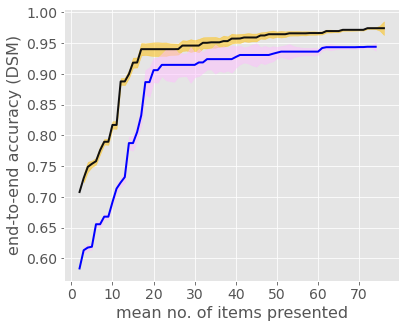

In [6]:
Lqr=df.groupby('L_quantized').count().run
Lqr1=df1.groupby('L_quantized').count().run
dfs=df.groupby('L_quantized').std().sort_index().acc.ewm(alpha=.51).mean()*(2/np.sqrt(Lqr.values))
dfm=df.groupby('L_quantized').max().sort_index().acc.cummax()
df1s=df1.groupby('L_quantized').std().sort_index().acc.ewm(alpha=.51).mean()*(2/np.sqrt(Lqr1.values))
df1m=df1.groupby('L_quantized').max().sort_index().acc.cummax()

fig=plt.figure(figsize=[6,5])
epx=.0
LW=2
#dfm=df.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
#df1m=df1.groupby('L').max().sort_index().acc.cummax().ewm(alpha=.4).mean()
#plt.fill_between(dfm.index.values,dfm+dfs.fillna(0).acc+epx,dfm-dfs.fillna(0).acc-epx,alpha=.5)
#epx=.0
plt.fill_between(df1m.index.values,df1m+df1s+epx,df1m-df1s-epx,alpha=.5,color='#FFBF00')
plt.fill_between(dfm.index.values,dfm+dfs+epx,dfm-dfs-epx,alpha=.5,color='#FFBFFF')
dfm.plot(color='b',lw=LW)
df1m.plot(color='#111111',lw=LW)
#plt.gca().set_ylim(.82,.95)
#plt.gca().set_xlim(10,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy (DSM)',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('./phase3results_new/Lvsacc_both.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(df1m).join(pd.DataFrame(df1s),rsuffix='_std').to_excel('./phase3results_new/itemsVsacc_DSM.xlsx')

In [7]:
df1[df1.acc.between(.91,.92)].sort_values('L',ascending=False)

,c1,c2,acc,s1,s2,nq_mean,nq_std,maxdepth,nest,run,L,L_quantized
4190,0.95,0.96,0.919887,0.964972,0.880961,62.992054,3.815695,7,15,19,63.0,63.0
1250,0.95,0.95,0.918820,0.974239,0.904596,62.065834,3.166973,7,15,5,62.1,62.0
5660,0.95,0.95,0.919724,0.968895,0.917480,62.078320,3.229686,7,15,26,62.1,62.0
6290,0.95,0.95,0.919349,0.969646,0.913957,61.810443,3.412161,7,15,29,61.8,62.0
5630,0.95,0.95,0.917860,0.974133,0.898145,60.101022,2.929363,7,13,26,60.1,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2322,0.95,0.94,0.917812,0.962804,0.956878,15.677639,3.024765,14,2,11,15.7,16.0
852,0.94,0.94,0.913068,0.980050,0.945163,15.391600,3.319857,14,2,4,15.4,15.0
2323,0.94,0.94,0.913678,0.974421,0.956762,15.446084,3.656923,15,2,11,15.4,15.0
5894,0.94,0.94,0.915554,0.985865,0.957356,15.375709,4.188065,16,2,28,15.4,15.0


In [8]:
# we can choose 15-3 for L~25 (acc~.92)
# we can choose 14-2 for L~13 items presented (acc~0.89)

In [9]:
#df1m_=df1.groupby('L').mean()

In [10]:
#df1m_.reset_index()[df1m_.reset_index().L.between(20,32)].set_index('L').acc.plot()

In [11]:
# get importance bounds
modelname='pXhase3results/P3_12_10_29.mod'
# load model
import dill
with open(modelname,'rb') as f:
    M=dill.load(f)
    
def getCF(Rs,LABELS=['B1','B2','B3']):  
    CF=np.zeros([3,3])
    s2=Rs.s1
    s3=Rs.s2
    c2=Rs.c1
    c3=Rs.c2
    CF=[[c2*c3,1-c2,c2*(1-c3)],[(1-s2)*(1-s3),s2,(1-s2)*s3],[c2*(1-s3),1-c2,c2*s3]]

    CF=pd.DataFrame(CF,columns=LABELS)
    CF.index=CF.columns
    return CF

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
df1_=df1[(df1.nest>=2) & (df1.maxdepth>=13)]
S=pd.DataFrame()
count=0
for i in df1_.iterrows():
    count=count+1
    cf=getCF(i[1])
    cfvar=getCF(i[1])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('phase3results_new/confusion_phase3.csv')
S_

,B1,B2,B3
B1,"0.963 (0.934, 0.992)","0.019 (0.002, 0.036)","0.018 (0.001, 0.035)"
B2,"0.006 (0.003, 0.009)","0.928 (0.897, 0.959)","0.066 (0.038, 0.094)"
B3,"0.089 (0.056, 0.122)","0.019 (0.002, 0.036)","0.892 (0.857, 0.927)"


In [13]:
S_.to_excel('phase3results_new/confusion_phase3.xlsx')

In [14]:
df_=df[(df.nest>=2) & (df.maxdepth>=13)]
S=pd.DataFrame()
count=0
for i in df_.iterrows():
    count=count+1
    cf=getCF(i[1],LABELS=['D1','D2',"D5"])
    cfvar=getCF(i[1],LABELS=['D1','D2',"D5"])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('phase3results_new/confusion_dsm.csv')
S_

,D1,D2,D5
D1,"0.931 (0.9, 0.962)","0.042 (0.023, 0.061)","0.027 (0.005, 0.049)"
D2,"0.01 (0.004, 0.016)","0.932 (0.898, 0.966)","0.058 (0.028, 0.088)"
D5,"0.146 (0.1, 0.192)","0.042 (0.023, 0.061)","0.812 (0.764, 0.86)"


In [15]:
xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
xf.index.name='subject_id'

df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
df=df.join(xf)#.head()                                                          
DELVAR=['DX','project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
df=df.dropna()
Ef=pd.read_excel('./2022summer/adeptphase3/BIOTYPES_HC_withBiofactors_21_1008.xlsx')
Ef_=Ef[['Subid',#'Age', 'Sex',
       'EEG1', 'EEG2', 'EEG3', 'EEG4', 'EEG5', 'EEG6', 'LATENCY',
       'ANTISACCADE', 'BACS', 'SST', 'IEA']]
df=df.join(Ef_.set_index('Subid')).dropna()


df0=df
#feature_names=df.drop(['Biotype','DX'],axis=1).columns
feature_names=df.drop(['Biotype'],axis=1).columns

In [16]:
df0.columns

Index(['Biotype', 'panss_p1', 'panss_p2', 'panss_p3', 'panss_p4', 'panss_p5',
       'panss_p6', 'panss_p7', 'panss_n1', 'panss_n2', 'panss_n3', 'panss_n4',
       'panss_n5', 'panss_n6', 'panss_n7', 'panss_g1', 'panss_g2', 'panss_g3',
       'panss_g4', 'panss_g5', 'panss_g6', 'panss_g7', 'panss_g8', 'panss_g9',
       'panss_g10', 'panss_g11', 'panss_g12', 'panss_g13', 'panss_g14',
       'panss_g15', 'panss_g16', 'madrs_1', 'madrs_2', 'madrs_3', 'madrs_4',
       'madrs_5', 'madrs_6', 'madrs_7', 'madrs_8', 'madrs_9', 'madrs_10',
       'young_1', 'young_2', 'young_3', 'young_4', 'young_5', 'young_6',
       'young_7', 'young_8', 'young_9', 'young_10', 'young_11', 'sfs_setotal',
       'sfs_ictotal', 'sfs_ipcptotal', 'sfs_ipcctotal', 'sfs_retotal',
       'sfs_prototal', 'sfs_oetotal', 'Age', 'Sex', 'BSNIP1vs2', 'Psychosis',
       'BACS_COMP_Z_within', 'BACS_Verb_Mem_within_imputed',
       'BACS_Dig_Seq_z_within_imputed', 'BACS_Tok_Mot_z_within_imputed',
       'BACS_Verb_Flu_z_wit

In [17]:
len(feature_names)

89

In [18]:
#MODELS

In [19]:
import glob
MODELS=glob.glob('pXhase3results/P3_14_*')+glob.glob('pXhase3results/P3_15_*')
I={}
for modelname in MODELS:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP3=M[3]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio3_vs_all':IMP3,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    I[modelname]=IMPdf.transpose().reset_index()
I=pd.concat(I.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

In [20]:
IMP1

array([0.00865181, 0.00598335, 0.00389504, 0.00476564, 0.00842896,
       0.00962631, 0.00255211, 0.00539677, 0.0050041 , 0.0052227 ,
       0.00447147, 0.00195354, 0.00580141, 0.00333517, 0.0055331 ,
       0.00454306, 0.00527014, 0.0075791 , 0.00515287, 0.00480727,
       0.00413096, 0.01074748, 0.00420754, 0.00554079, 0.0056156 ,
       0.00401065, 0.00628311, 0.00335503, 0.00625122, 0.00655546,
       0.00508578, 0.00649934, 0.00320337, 0.00522916, 0.00231933,
       0.00422287, 0.00430447, 0.00367832, 0.00412708, 0.00127205,
       0.00604355, 0.00552514, 0.00421382, 0.00795349, 0.00642262,
       0.00153141, 0.00453519, 0.00227988, 0.00636093, 0.0050353 ,
       0.00468673, 0.00565375, 0.00501922, 0.00546799, 0.00423393,
       0.00586736, 0.00972088, 0.00558687, 0.00561199, 0.0077723 ,
       0.00514601, 0.        , 0.01799356, 0.01033097, 0.00625508,
       0.00703141, 0.00898122, 0.00575423, 0.01158411, 0.00528605,
       0.0068391 , 0.00714757, 0.00511169, 0.00889002, 0.00379

In [21]:
from itertools import cycle, islice
custom_colors = list(islice(cycle(['#AF1D1D','#4575F0','#1AB44A']), None, 3))
plt.style.use('seaborn-whitegrid')

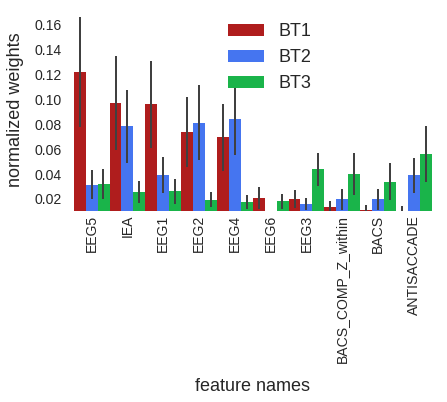

In [22]:
fig=plt.figure(figsize=[6,3.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()

sImean=Imean.sort_values('bio1_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsd=Isd.loc[:,sImean.columns]


FS=18
FS2=14
w=0.33
LW=2
COL='.25'



sImean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImean.columns)), sImean.loc['bio2_vs_all',:].values,
             sIsd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))-w, sImean.loc['bio1_vs_all',:].values,
             sIsd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))+w, sImean.loc['bio3_vs_all',:].values,
             sIsd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.7, 1),ncol=1)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=10)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2, rotation=0);
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('phase3results_new/sorted_impPhase3.png',dpi=300,bbox_inches='tight',transparent=True)

In [23]:
sImean.columns

Index(['EEG5', 'IEA', 'EEG1', 'EEG2', 'EEG4', 'EEG6', 'EEG3',
       'BACS_COMP_Z_within', 'BACS', 'ANTISACCADE'],
      dtype='object')

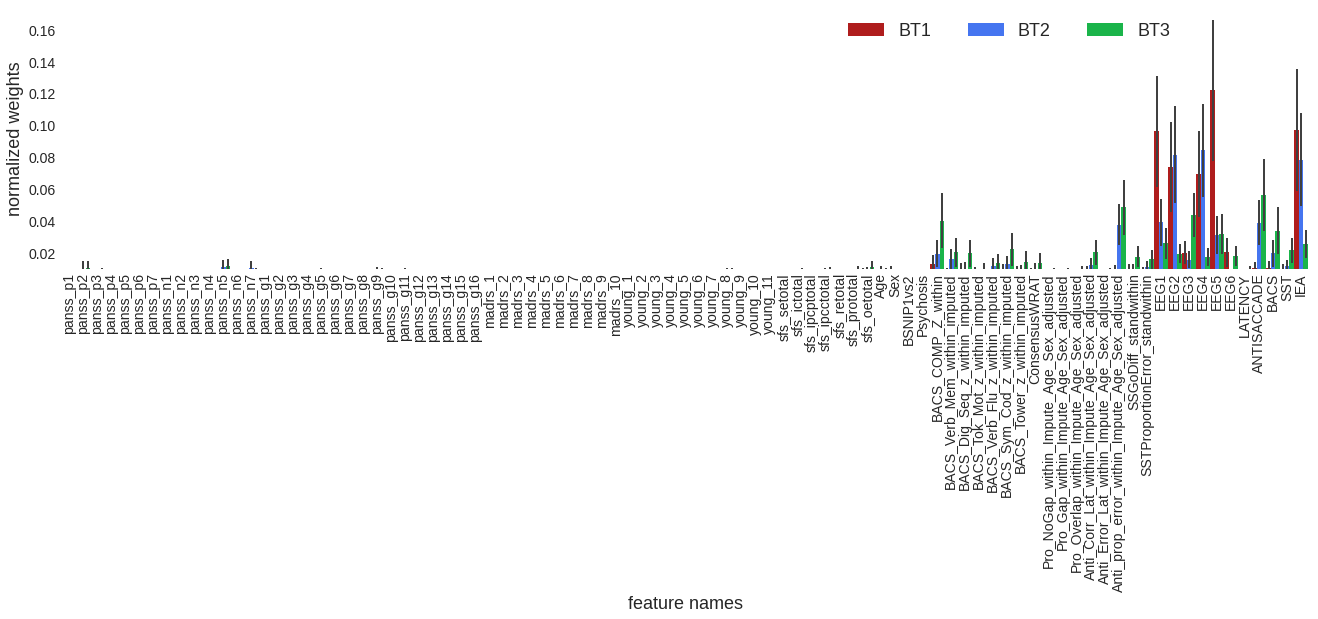

In [24]:
fig=plt.figure(figsize=[20,4.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()
FS=18
FS2=14
w=0.33
LW=2
COL='.25'
Imean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(Imean.columns)), Imean.loc['bio2_vs_all',:].values,
             Isd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))-w, Imean.loc['bio1_vs_all',:].values,
             Isd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))+w, Imean.loc['bio3_vs_all',:].values,
             Isd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(Imean.columns,rotation=90);
#plt.legend(bbox_to_anchor=(.5, 1), loc='upper left', borderaxespad=0)
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);

plt.savefig('phase3results_new/impPhase3.png',dpi=300,bbox_inches='tight',transparent=True)

In [25]:
Imean.transpose().join(Isd.transpose(),rsuffix='_cnfband').to_excel('./phase3results_new/feature_impotance_biotype.xlsx')

In [26]:
custom_colors = list(islice(cycle(['.1','.4','.7']), None, 3))

In [27]:
import glob
MODELSdsm=glob.glob('pXhase3results/DSM3_13_*')+glob.glob('pXhase3results/DSM3_14_*')
Idsm={}
for modelname in MODELSdsm:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP5=M[5]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio5_vs_all':IMP5,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    Idsm[modelname]=IMPdf.transpose().reset_index()
Idsm=pd.concat(Idsm.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

In [28]:
#Imeandsm

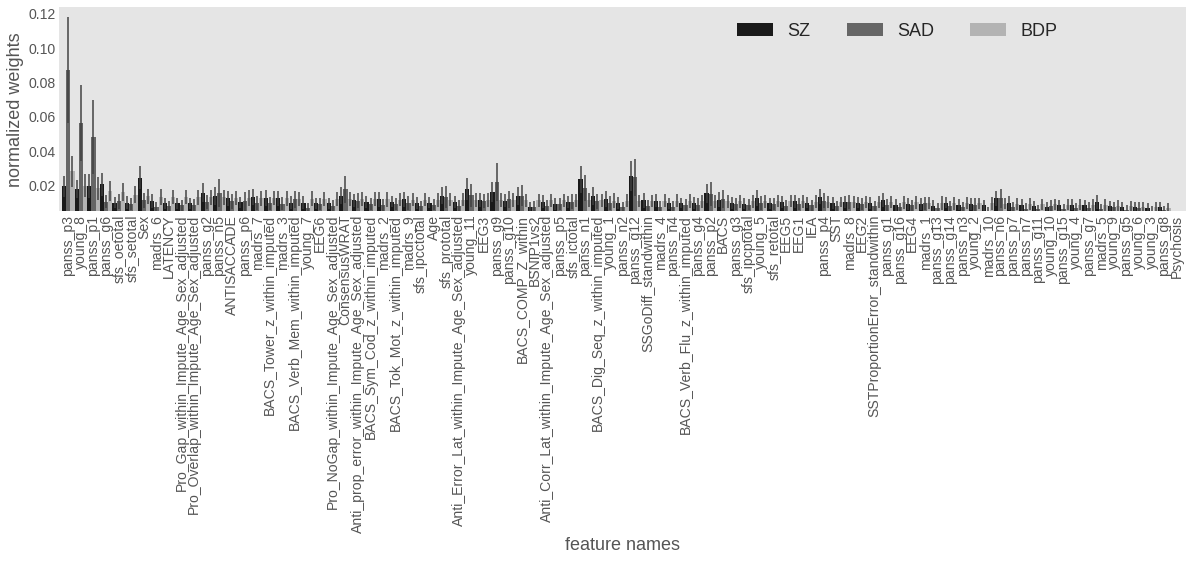

In [29]:
fig=plt.figure(figsize=[18,3.5])
Imeandsm=Idsm.groupby('index').mean()
Isddsm=Idsm.groupby('index').std()

Imeandsm=Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False)
Isddsm=Isddsm.transpose()
Isddsm=Isddsm.loc[Imeandsm.index,:]
Isddsm=Isddsm.transpose()
Imeandsm=Imeandsm.transpose()


if 'DX' in Imeandsm.columns:
    Imeandsm=Imeandsm.drop('DX',axis=1)
    Isddsm=Isddsm.drop('DX',axis=1)
columns=Imeandsm.columns
FS=18
FS2=14

w=0.33
LW=2
COL='.25'
Imeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(columns)), Imeandsm.loc['bio2_vs_all',:].values,
             Isddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(columns))-w, Imeandsm.loc['bio1_vs_all',:].values,
             Isddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(columns))+w, Imeandsm.loc['bio5_vs_all',:].values,
             Isddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

plt.gca().set_xticks(np.arange(len(columns)))
plt.gca().set_xticklabels(columns,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.0051,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('phase3results_new/impDSM3.png',dpi=300,bbox_inches='tight',transparent=True)

In [30]:
sImeandsm=Imeandsm.sort_values('bio5_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsddsm=Isddsm.loc[:,sImeandsm.columns]

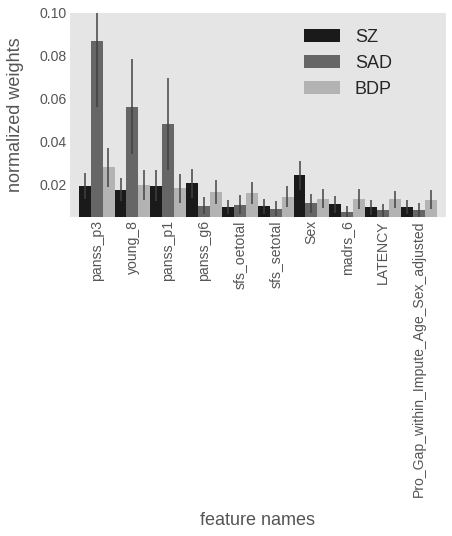

In [31]:
fig=plt.figure(figsize=[6,3.5])
FS=18
FS2=14

w=0.33
LW=2
COL='.25'
sImeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImeandsm.columns)), sImeandsm.loc['bio2_vs_all',:].values,
             sIsddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))-w, sImeandsm.loc['bio1_vs_all',:].values,
             sIsddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))+w, sImeandsm.loc['bio5_vs_all',:].values,
             sIsddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=1)
ax=plt.gca()
ax.set_ylim(0.0051,0.1)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=15)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('phase3results_new/sorted_impDSM.png',dpi=300,bbox_inches='tight',transparent=True)

In [32]:
Imeandsm

,panss_p3,young_8,panss_p1,panss_g6,sfs_oetotal,sfs_setotal,Sex,madrs_6,LATENCY,Pro_Gap_within_Impute_Age_Sex_adjusted,...,panss_g15,young_4,panss_g7,madrs_5,young_9,panss_g5,young_6,young_3,panss_g8,Psychosis
index,,,,,,,,,,,,,,,,,,,,,
bio1_vs_all,0.019404,0.017732,0.019516,0.020641,0.009732,0.009981,0.024387,0.010903,0.009424,0.009556,...,0.008265,0.008668,0.008473,0.010095,0.007780,0.007643,0.007426,0.006837,0.007292,0.0
bio2_vs_all,0.087019,0.056338,0.048234,0.010329,0.010713,0.008912,0.011353,0.007118,0.008060,0.008362,...,0.006013,0.006729,0.007054,0.006310,0.007475,0.005572,0.007004,0.005170,0.005469,0.0
bio5_vs_all,0.028092,0.019858,0.018258,0.016645,0.016071,0.014425,0.013608,0.013317,0.013163,0.013098,...,0.008782,0.008724,0.008718,0.008606,0.008153,0.008107,0.007613,0.007411,0.007051,0.0


In [33]:
Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False).to_excel('phase3results_new/dsmfeaturessorted.xlsx')
Imean.transpose().sort_values('bio3_vs_all',ascending=False).to_excel('phase3results_new/phase2featuressorted.xlsx')

In [34]:

def getAVlen(clf,X,cid=0):
    RES=pd.DataFrame(columns=['Lmean','Lstd','compid'])
    count=0
    threshold={}
    feature={}
    node_indicator={}
    leaf_id={}

    for i in clf.estimators_:
        feature[count]= i.tree_.feature
        node_indicator[count] = i.tree_.decision_path(X)
        count=count+1
    
    #print(count)
    L=[]
    LL=[]
    for sample_id in np.arange(len(X)):
        L=[]
        for i in range(count-1):
            L=L+list(feature[i][node_indicator[i].indices[node_indicator[i].indptr[sample_id] : node_indicator[i].indptr[sample_id + 1]]][1:-1])
        LL=np.append(LL,len(list(set(L))))
    L=list(set(L))
    
    RES['Lmean']=[np.mean(LL)]
    RES['Lstd']=[np.std(LL)]
    RES['compid']=[cid]
    return RES    
    


In [35]:
Ef=pd.read_excel('./2022summer/adeptphase3/BIOTYPES_HC_withBiofactors_21_1008.xlsx')
Ef_=Ef[['DSM','DSM String']].dropna()
Ef_.DSM=[int(x) for x in Ef_.DSM.values]
xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
xf.index.name='subject_id'
df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
df=df.join(xf)
DELVAR=['project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
Xphase1=df.dropna().iloc[:,1:].values.astype(np.float32)

df=df.join(Ef_).dropna()#[['DSM','Biotype']]
df=df[df['DSM String']!='HC'].drop(['Biotype','DSM String'],axis=1)
Xdsm=df.drop('DSM',axis=1).values.astype(np.float32)

In [36]:
def getModelAvLen(modelfile='phase3results_new/P3_10_3_0.mod'):
    import sys
    import warnings

    if not sys.warnoptions:
        warnings.simplefilter("ignore")    
        
    with open(modelfile,'rb') as f:
        M=dill.load(f)
    return pd.concat([getAVlen(M[key]['estimator'],Xphase1,cid=key) for key in M.keys()])

In [37]:
import glob
MODELS=glob.glob('pXhase3results/P3_14_2_*.mod')#+glob.glob('P2models/P2_15_3_*.mod')
af=pd.concat([getModelAvLen(model)for model in MODELS])
af

,Lmean,Lstd,compid
0,9.436312,2.960246,1
0,8.445817,1.936225,2
0,8.318441,1.924507,3
0,6.674905,2.351849,1
0,8.750000,1.523969,2
...,...,...,...
0,5.882129,1.902416,2
0,8.901141,2.711705,3
0,7.038023,1.860250,1
0,8.453422,2.589229,2


In [38]:
af[af.compid==1].mean()

Lmean     8.416477
Lstd      1.958843
compid    1.000000
dtype: float64

In [39]:
af[af.compid==2].mean()

Lmean     8.232953
Lstd      1.996434
compid    2.000000
dtype: float64

In [40]:
af[af.compid==3].mean()

Lmean     8.705133
Lstd      2.150761
compid    3.000000
dtype: float64

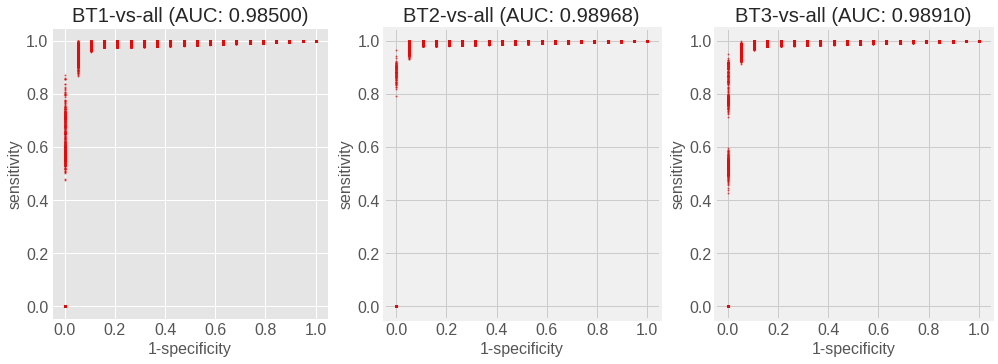

In [41]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='pXhase3results/P3_14_2_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('./phase3results_new/ROC_phase3.png',dpi=400,bbox_inches='tight',transparent=True)


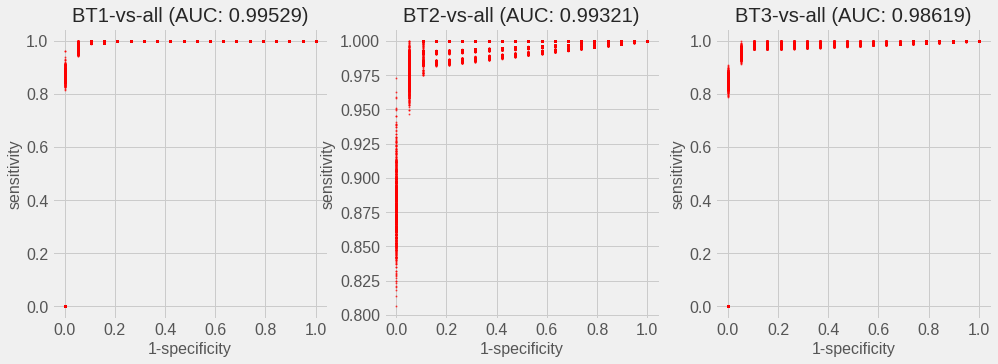

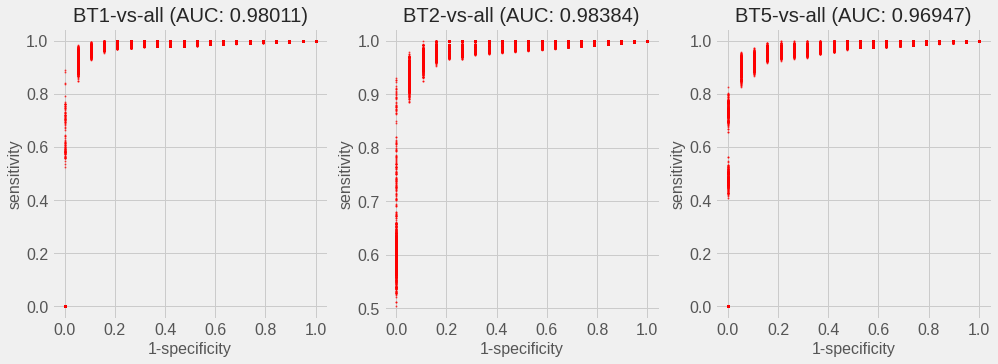

In [42]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='pXhase3results/P3_15_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('./phase3results_new/ROCvall_phase3_max.png',dpi=400,bbox_inches='tight',transparent=True)



modelfile='pXhase3results/DSM3_12_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,5,plt.gca(),FS=16)
plt.savefig('./phase3results_new/ROCvall_clinical_DSM.png',dpi=400,bbox_inches='tight',transparent=True)



In [43]:
rho=0.04
s1=.388
PPV1=.146
s=.62
PPV=.178
A= (1 - ((s1*rho)/PPV1))
C= (1-s1)/(1-((s1*rho)/PPV1))
B=A*s*rho*((1/PPV)-1)*C
A,B

(0.8936986301369862, 0.07008981573033708)